<a href="https://colab.research.google.com/github/k-tharshini/CODSOFT/blob/main/Data_Science_Task_1(Titanic_survival_prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

In [ ]:
# Load data (replace with your path)
# For example, Titanic train.csv from Kaggle
data = pd.read_csv('/content/titanic.csv')

In [ ]:
# Quick look at data
print(data.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
#check missing values
Missing_value = data.isnull().sum()
print(Missing_value)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Basic preprocessing
# Fill missing Age with median
data['Age'] = data['Age'].fillna(data['Age'].median())
Miss_age = data['Age'].isnull().sum()
print(Miss_age)

# Fill Embarked with most frequent
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
Miss_Embarked = data['Embarked'].isnull().sum()
print(Miss_Embarked)

0
0


In [ ]:
Missing_value = data.isnull().sum()
print(Missing_value)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [ ]:
# Encode Sex and Embarked
lc=LabelEncoder()
data['Sex'] = lc.fit_transform(data['Sex'])
data['Embarked'] = lc.fit_transform(data['Embarked'])
print(data['Sex'])
print(data['Embarked'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64
0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64


In [ ]:

# Drop Cabin (too many missing)
data = data.drop(columns=['Cabin','Ticket','Name','PassengerId'])

In [ ]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
# Features and target
X = data.drop('Survived', axis=1)
y = data['Survived']
print (y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [ ]:

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
331       1    0  45.5      0      0   28.5000         2
733       2    0  23.0      0      0   13.0000         2
382       3    0  32.0      0      0    7.9250         2
704       3    0  26.0      1      0    7.8542         2
813       3    1   6.0      4      2   31.2750         2
..      ...  ...   ...    ...    ...       ...       ...
106       3    1  21.0      0      0    7.6500         2
270       1    0  28.0      0      0   31.0000         2
860       3    0  41.0      2      0   14.1083         2
435       1    1  14.0      1      2  120.0000         2
102       1    0  21.0      0      1   77.2875         2

[712 rows x 7 columns]
331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64
     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
709       3    0  28.0      1      1  15.2458         0
439       2    0  31.0      0      0  1

In [ ]:
# Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict
y_pred = clf.predict(X_test)
print(y_pred)
y_prob = model.predict_proba(X_test)[:, 1]
print(y_prob)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]
[0.35       0.03       0.155      0.97       0.39       0.97
 0.83404906 0.07       0.70277778 0.93       0.39       0.095
 0.01       0.1        0.2347619  0.98       0.3        0.95392857
 0.18       0.04       0.01       0.51716667 0.16       0.
 0.         0.1        0.06       0.06092857 0.25       0.61
 0.01666667 0.77       0.79       0.56       0.30577381 0.13
 0.62       0.83404906 0.86       0.         0.06       0.13
 0.         0.12042657 0.45       0.06       0.44730952 0.
 0.33       0.45       0.86       0.97       0.01       0.8
 0.03       0.92       0.06733333 0.9        0.91       0.41888889
 0.265      0.9275

In [ ]:
# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.82


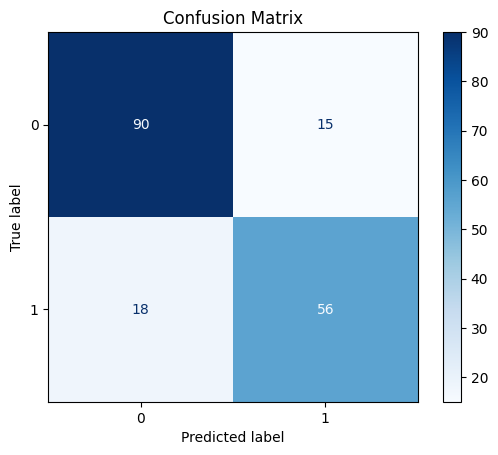

In [ ]:
# 🔹 Confusion Matrixcm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

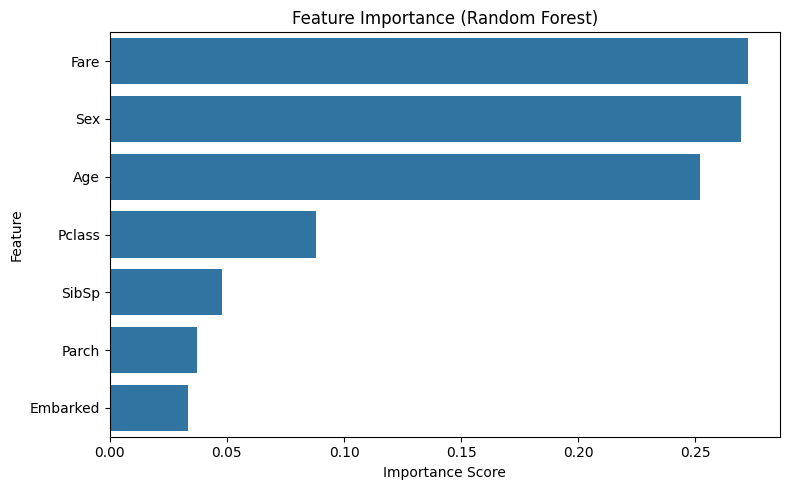

In [ ]:
#Feature Importance
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

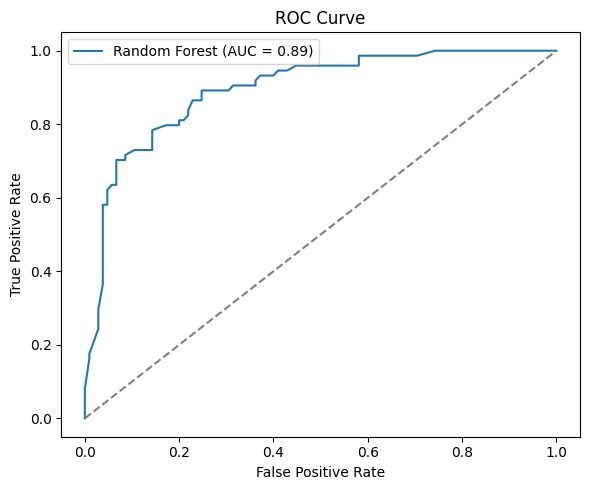

In [ ]:

#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



In [ ]:

# Get manual input
print("Enter passenger details:")

pclass = int(input("Pclass (1, 2, 3): "))
sex = input("Sex (male or female): ")
age = float(input("Age: "))
sibsp = int(input("Siblings/Spouses aboard (SibSp): "))
parch = int(input("Parents/Children aboard (Parch): "))
fare = float(input("Fare: "))
embarked = input("Embarked (C, Q, S): ")

Enter passenger details:
Pclass (1, 2, 3): 2
Sex (male or female): male
Age: 34
Siblings/Spouses aboard (SibSp): 3
Parents/Children aboard (Parch): 0
Fare: 23.45
Embarked (C, Q, S): S


In [ ]:
# Encode categorical inputs using previously fit LabelEncoders
sex_encoded = lc.fit_transform([sex])[0]
embarked_encoded = lc.fit_transform([embarked])[0]

# Prepare input DataFrame
user_input = pd.DataFrame([{
    'Pclass': pclass,
    'Sex': sex_encoded,
    'Age': age,
    'SibSp': sibsp,
    'Parch': parch,
    'Fare': fare,
    'Embarked': embarked_encoded
}])

# Predict
prediction = clf.predict(user_input)[0]

# Output result
if prediction == 1:
    print("\n Prediction: The passenger would have SURVIVED.")
else:
    print("\n Prediction: The passenger would NOT have survived.")


 Prediction: The passenger would have SURVIVED.
